### Loss Functions

#### References:
- [Cross-Entropy](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
- [Cross-Entropy Loss Explained](https://vitalflux.com/cross-entropy-loss-explained-with-python-examples/)
- [Binary Cross-Entropy Explained](https://sparrow.dev/binary-cross-entropy/)

<a href="https://colab.research.google.com/github/paulaceccon/ml-from-scratch/blob/main/notebooks/loss_functions.ipynb" target="_parent" style="float: left;"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Regression

- **Output Layer Configuration:** One node with a linear activation unit.
- **Loss Function:** MSE, RMSE, MAE.

In [2]:
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return (np.square(y_true - y_pred)).mean()

### Binary Classification

- **Output Layer Configuration:** One node with a sigmoid activation unit.
- **Loss Function:** Cross-Entropy, also referred to as Logarithmic loss.

In [3]:
def binary_cross_entropy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    y_true: ground-truth labels where each is one of (0, 1)
    y_pred: predictions between [0, 1]
    """
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

- We can't use a model that predicts 0 or 1 for `y_pred`. This is because `np.log(0)` is `-inf`. For this reason, we typically apply the sigmoid activation function to raw model outputs. This allows values to get close to 0 or 1, but never actually reach the extremes of the range.
- For `y = 1`, if predicted probability is near 1, loss function out, `J(W)`, is close to 0 otherwise it is close to infinity.
- For `y = 0`, if predicted probability is near 0, loss function out, `J(W)`, is close to 0 otherwise it is close to infinity.
- Cross entropy loss is high when the predicted probability is way different than the actual class label (0 or 1).
- Cross entropy loss is loss when the predicted probability is closer or nearer to the actual class label (0 or 1).

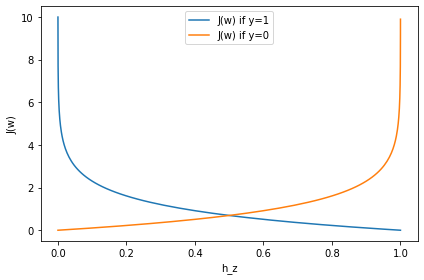

In [4]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)  # logits

# Value of cost function when y = 1
# -log(h(x))
cost_1 = [binary_cross_entropy(1, z_) for z_ in h_z]

# Value of cost function when y = 0
# -log(1 - h(x))
cost_0 = [binary_cross_entropy(0, z_) for z_ in h_z]

plt.plot(h_z, cost_1, label="J(w) if y=1")
plt.plot(h_z, cost_0, label="J(w) if y=0")
plt.xlabel("h_z")
plt.ylabel("J(w)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Multi-class Classification

- **Output Layer Configuration:** One node for each class using the softmax activation function.
- **Loss Function:** Cross-Entropy, also referred to as Logarithmic loss.

In [5]:
def categorical_cross_entropy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    y_true: ground-truth labels where each is one of (0, 1)
    y_pred: predictions between [0, 1]

    Note:
        If y_pred are logits, it's necessary to run softmax.
    """
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)  # clip to avoid log(0)
    return np.sum(y_true * -np.log(y_pred), axis=0).mean()

In [6]:
y_true = np.array([[0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.05, 0.95, 0.05], [0.1, 0.8, 0.1]])  # softmax

categorical_cross_entropy(y_true, y_pred)

0.7846261291271986